# Contents

01. Importing libraries
02. Check matplotlib version
03. Importing data
04. Check dataframe
05. Select variables for exploratory visual analysis
06. Create a correlation matrix heatmap using seaborn
07. Create a scatterplot
08. Create a pair plot
09. Create categorical plot
10. Exporting visualizations and data

### 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

### 02. Check matplotlib version

In [2]:
# Check matplotlib version
matplotlib.__version__

'3.3.2'

### 03. Importing data

In [3]:
# Import main folder
path = r'C:\Users\amwil\OneDrive\Career Foundry Project Work\07-2021 ABNB NYC Data Analysis'

In [4]:
# Import AB_NYC_2019_cleaned.csv
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'AB_NYC_2019_cleaned.csv'), index_col = False)

### 04. Check dataframe

In [5]:
# Check df shape
df.shape

(48895, 14)

In [6]:
# Check beginning of df
df.head()

,Listing id,Host id,Borough,Neighborhood,Latitude,Longitude,Room type,Price,Minimum nights for rent,Number of reviews,Last review,Reviews per month,Number of listings per host,Availability per year
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,2018-10-19,0.210000,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,2019-05-21,0.380000,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,2019-06-23,1.373221,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270,2019-07-05,4.640000,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9,2018-11-19,0.100000,1,0


### 05. Select variables for exploratory visual analysis

#### Q2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis. 

##### 1. Which borough has the highest/lowest prices for rentals?
##### 2. What is the distribution of prices among the different room types?
##### 3. Which room type is most/least popular?
##### 4. Which room type is most/least popular by borough?
##### 5. Which borough has the most/least rentals?

#### Based on these questions, the variables suitable for the exploratory visual analysis are Listing id, Borough, Room type, and Price. However, Borough and Room type won't appear on the heatmap as their qualitative. Therefore, I'll check the relationships among the other variables.

### 06. Create a correlation matrix heatmap using seaborn

In [7]:
# Create a subset for exploratory visual analysis
df_sub = df[['Listing id', 'Host id', 'Latitude', 'Longitude', 'Price', 'Minimum nights for rent', 'Number of reviews', 'Reviews per month', 'Number of listings per host','Availability per year']]

In [8]:
# Check subset
df_sub

,Listing id,Host id,Latitude,Longitude,Price,Minimum nights for rent,Number of reviews,Reviews per month,Number of listings per host,Availability per year
0,2539,2787,40.64749,-73.97237,149.0,1.0,9,0.210000,6,365
1,2595,2845,40.75362,-73.98377,225.0,1.0,45,0.380000,2,355
2,3647,4632,40.80902,-73.94190,150.0,3.0,0,1.373221,1,365
3,3831,4869,40.68514,-73.95976,89.0,1.0,270,4.640000,1,194
4,5022,7192,40.79851,-73.94399,80.0,10.0,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,40.67853,-73.94995,70.0,2.0,0,1.373221,2,9
48891,36485057,6570630,40.70184,-73.93317,40.0,4.0,0,1.373221,2,36
48892,36485431,23492952,40.81475,-73.94867,115.0,10.0,0,1.373221,1,27
48893,36485609,30985759,40.75751,-73.99112,55.0,1.0,0,1.373221,6,2


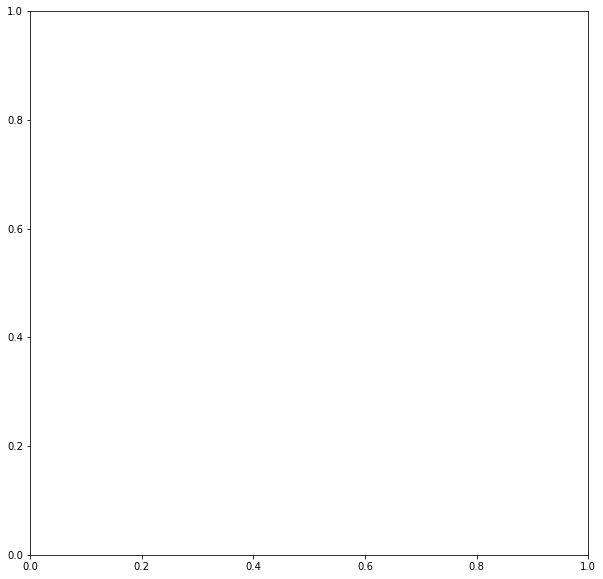

In [9]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

In [10]:
# Create a correlation heatmap in seaborn
correlation_heatmap = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

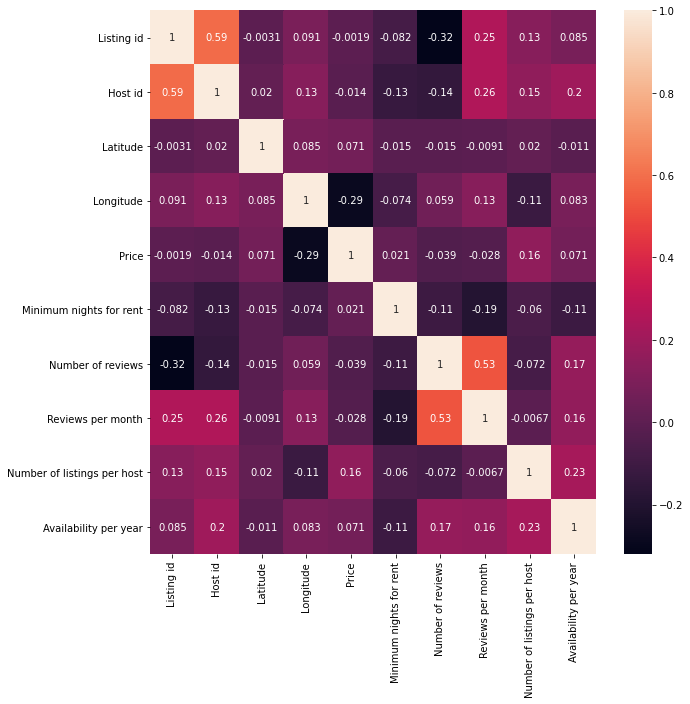

In [11]:
# Check correlation matrix heatmap
correlation_heatmap.figure

#### Q3. Create a correlation matrix heatmap (colored). Discuss what the coefficients in the plot mean in terms of the relationships between the variables. Among the different variables, those which have an interdependence are as follows:

##### Strong relationship - Listing id and Host id 
##### Strong relationship - Number of reviews and Reviews per month
##### Weak relationship - Reviews per month and Listing id
##### Weak relationship - Reviews per month and Host id
##### Weak relationship - Number of listings per host and Availability per year

### 07. Create a scatterplot

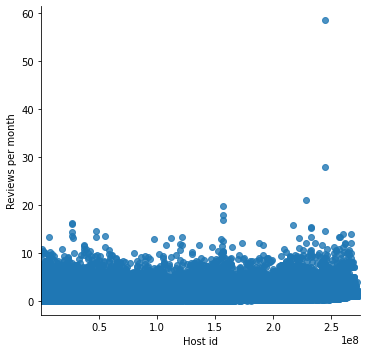

In [12]:
# Create a scatterplot for Host id and Reviews per month
scatterplot = sns.lmplot(x = 'Host id', y = 'Reviews per month', data = df)

#### Q4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell. Since the variables in the dataset have no real relationships that exist among them, I chose to create a scatterplot for Host id and Number of reviews per month. In general, the number of reviews per month for hosts are 0 to 10. There are a few instances where some hosts have a bit more than 10. One host even has as many as 60 per month.

### 08. Create a pair plot

In [13]:
# Create a second subset of the variables
df_sub_2 = df[['Listing id', 'Host id', 'Borough', 'Neighborhood', 'Room type', 'Latitude', 'Longitude', 'Price', 'Minimum nights for rent', 'Number of reviews', 'Reviews per month', 'Last review', 'Number of listings per host','Availability per year']]

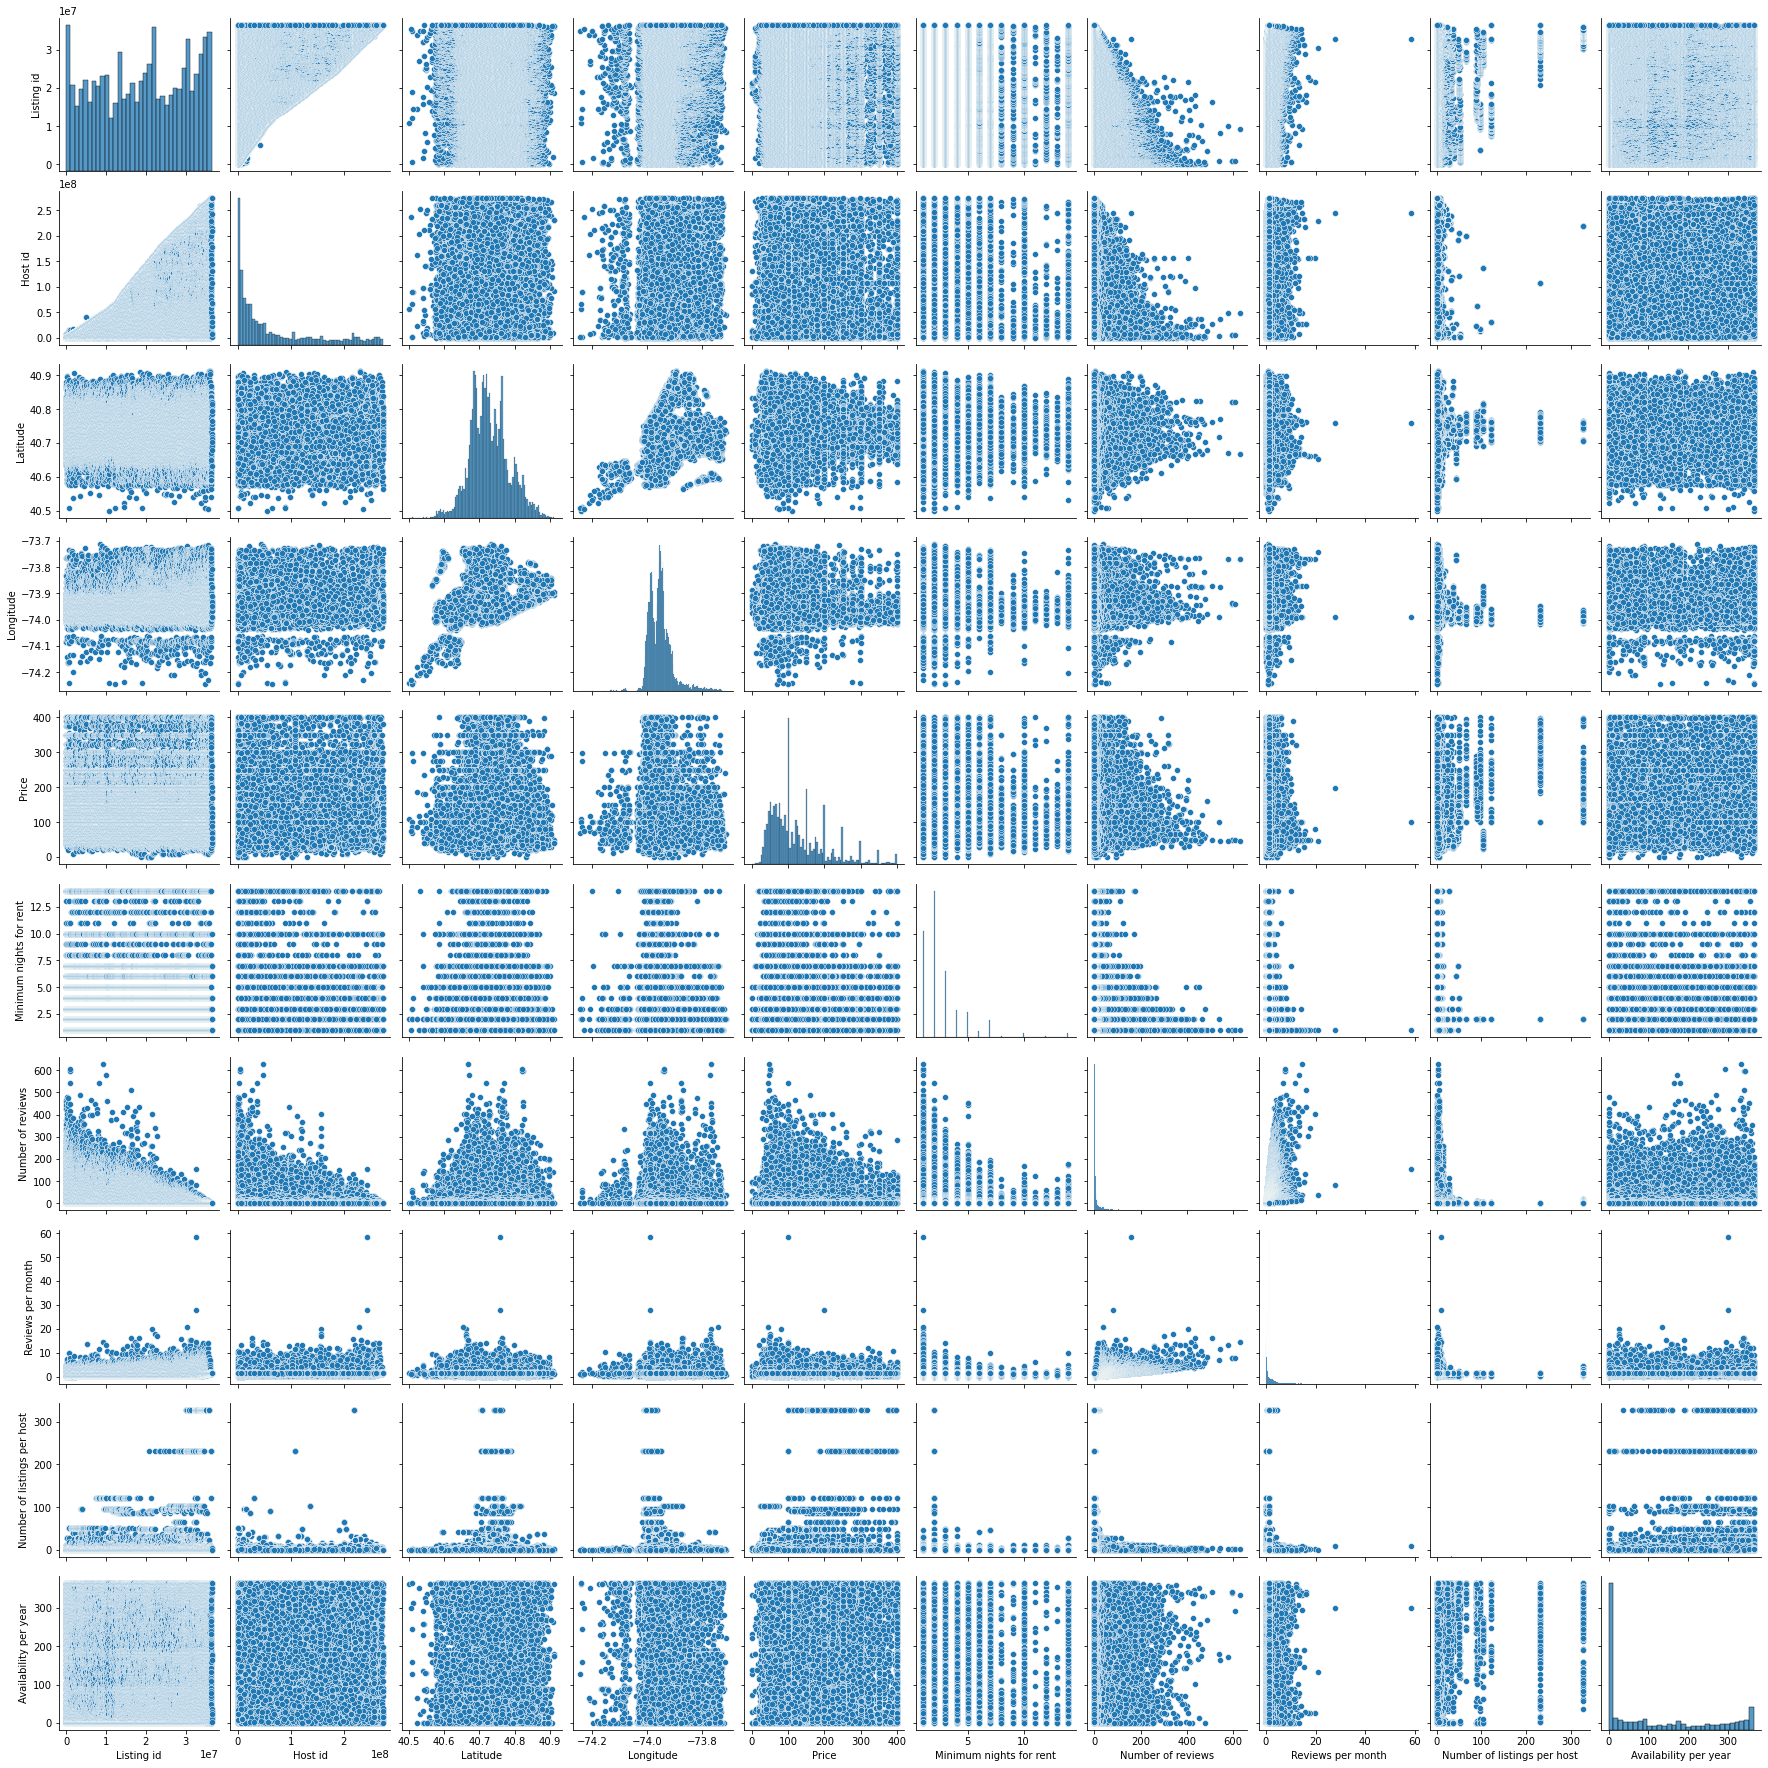

In [14]:
# Create a pair plot
pair_plot = sns.pairplot(df_sub_2)

#### Q5. Create a pair plot of the entire data set. Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why. This visualization is very overwheliming. The Minimum nights for rent column seems to have the most structure when crossed with all other variables. Mostly, the variables when crossed with each other appears as clusters of data points.

### 09. Create categorical plot

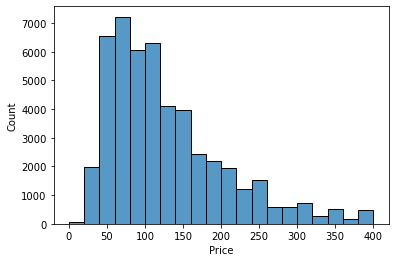

In [15]:
# Create a histogram to view distribution of price column
histogram = sns.histplot(df['Price'], bins = 20)

In [16]:
# Create categories using price column
df.loc[df['Price'] < 100, 'Price category'] = 'Low price'
df.loc[(df['Price'] >= 100) & (df['Price'] < 200), 'Price category'] = 'Middle price'
df.loc[df['Price'] >= 200, 'Price category'] = 'High price'

In [17]:
# Check Price category frequency
df['Price category'].value_counts(dropna = False)

Low price       21877
Middle price    18996
High price       8022
Name: Price category, dtype: int64

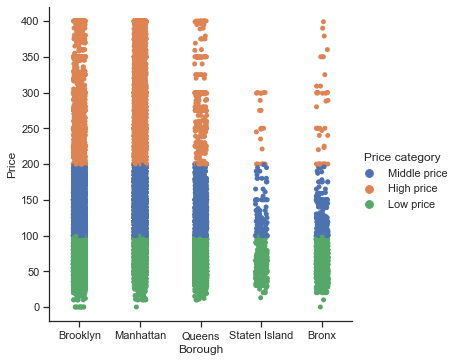

In [18]:
# Create a categorical plot of Price category in seaborn
sns.set(style="ticks")
categorical_plot = sns.catplot(x="Borough", y="Price", hue="Price category", data=df)

#### Q6. Create a categorical plot and interpret the results. From the visualization, it appears that Manhattan has the highest number of listings with a high price. Brooklyn has the highest number of listings with a low price. 

#### Q7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration. The only question I was able to answer based on the exploration I've done is Question 1 - Which borough has the highest/lowest prices for rentals? Manhattan has the highest and Brooklyn has the lowest. At this time, I do not have any additional questions that arose from my early findings.

#### Q8. Define any hypotheses that you can at this point. You’ll be testing these later on. None at this point.

### 10. Exporting charts and data

In [19]:
# Export correlation matrix heatmap
correlation_heatmap.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_heat.png'))

In [20]:
# Export scatterplot
scatterplot.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_host_reviews.png'))

In [21]:
# Export pair plot
pair_plot.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pair_plot_all.png'))

In [22]:
# Export histogram
histogram.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_price.png'))

In [23]:
# Export categorical plot
categorical_plot.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_plot_borough_price.png'))

In [24]:
# Export AB_NYC_2019_Visually_Explored.csv
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'AB_NYC_2019_Visually_Explored.csv'), index= False)